# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
from scipy.stats import norm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Dicionário

**CO_UF_RESIDENCIA**

    1º Dígito: Região
        1: Norte
        2: Nordeste
        3: Sudeste
        4: Sul
        5: Centro-Oeste
    2º Dígito: Estado
    
**TP_SEXO**

     M: Masculino
     F: Feminino 

**TP_ESTADO_CIVIL**
 
     0: Solteiro(a)
     1: Casado(a)/Mora com companheiro(a)
     2: Divorciado(a)/Desquitado(a)/Separado(a)
     3: Viúvo(a)

**TP_COR_RACA**
 
     0: Não declarado
     1: Branca
     2: Preta
     3: Parda
     4: Amarela
     5: Indígena 
     6: Não dispõe da informação
    
**TP_ST_CONCLUSAO**

    1: Já concluí o Ensino Médio
    2: Estou cursando e concluirei o Ensino Médio em 2016
    3: Estou cursando e concluirei o Ensino Médio após 2016
    4: Não concluí e não estou cursando o Ensino Médio
     
**TP_ANO_CONCLUIU**

    0:  Não informado
    1:  2015
	2:  2014
	3:  2013
	4:  2012
	5:  2011
	6:  2010
	7:  2009
	8:  2008
    9:  2007
	10: Anterior a 2007
    
**TP_DEPENDENCIA_ADM_ESC**

    1: Federal
    2: Estadual
    3: Municipal
    4: Privada
    
**TP_LOCALIZACAO_ESC**

    1: Urbana
    2: Rural


# Data Exploration

In [3]:
df_train = pd.read_csv('C:\\Users\\Luiz Guilherme\\Desktop\\Desafio_ENEM\\train.CSV')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13730 entries, 0 to 13729
Columns: 167 entries, Unnamed: 0 to Q050
dtypes: float64(28), int64(79), object(60)
memory usage: 17.5+ MB


In [3]:
pd.set_option('display.max_rows', 5)
pd.set_option('display.max_columns', 167)
df_train.head()

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_SABATISTA,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_MACA,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,IN_CERTIFICADO,NO_ENTIDADE_CERTIFICACAO,CO_UF_ENTIDADE_CERTIFICACAO,SG_UF_ENTIDADE_CERTIFICACAO,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027,Q028,Q029,Q030,Q031,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,1,1,4314902.0,Porto Alegre,43.0,RS,1,4,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,4314902,Porto Alegre,43,RS,1,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,436.3,495.4,581.2,399.4,ABACCABDBEDEDEEDDDBBBDAABABECDCCCAAABCBEEABCA,BBEBCAEBCEDBDDEBCACDBCBDABDDCDBEDCEAEABCAADAC,99999DCABCABCBBCADBCBBABAEADBEEBEDAAABAEAECCBB...,AECCCBABDCADDBCBCCADADBBAADEBCEEBABCDDEAABCAA,1,BCADBCEDCCBADBDCADBEBDBEADCCAEACDBEDBCACAEBEE,BCBCCADCCBEDDBEEADBDCECCBBECAEEDDADCDDACAADBA,CEDEACCBEBDBABECABDADEADCEDCBEBBCEBAAEBAAECBBC...,DADCCECBDECADCBACDBCEEABDDAABDBCEADDBECEBAEBC,1.0,120.0,120.0,120.0,80.0,80.0,520.0,D,D,B,B,3,C,A,B,B,B,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A,C,H,E,5.0,5.0,1.0,0.0,0.0,5,5,0,5,5,5,5,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,3,1,2304707.0,Granja,23.0,CE,2,0,2,1.0,0,23005157.0,2304707.0,Granja,23.0,CE,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2304707,Granja,23,CE,1,1,1,1,b9b06ce8c319a3df2158ea3d0aef0f7d3eecaed7,909237ab0d84688e10c0470e2997348aff585273,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,474.5,544.1,599.0,459.8,EDAAABDABADBCCAEDCDDECABADBEECBBAEEDCABCAABBC,ADCAABAADCEDAACDACEEDACBDCBACEDEDBACAADADABDC,99999ACBACDBDBCEADDAEEADCCEACEEDBECAAAACBECDAC...,AEDACBDECEDAEEAEDDEBDECDCECACADCACACAABDACEAB,1,EBEECADBCABECDDBEADCCABDEABEBCADBADDCCCEDBBCA,DCECBAAADCBBECAEDCEDDACCBDDACEDDBADBCADBCBCEE,CEDEACCBEBDBABECABDADEADCEDCBEBBCEBAAEBAAECBBC...,DADCCECBDECADCBACDBCEEABDDAABDBCEA

In [4]:
df_train['NU_NOTA_MT'].describe()

count    10133.000000
mean       482.497928
             ...     
75%        537.600000
max        952.000000
Name: NU_NOTA_MT, Length: 8, dtype: float64

In [2]:
df_train = pd.read_csv('C:\\Users\\Luiz Guilherme\\Desktop\\Desafio_ENEM\\train.CSV')
df_train = df_train[pd.notnull(df_train['NU_NOTA_CH'])]
df_train = df_train[pd.notnull(df_train['NU_NOTA_CN'])]
df_train = df_train[pd.notnull(df_train['NU_NOTA_LC'])]
df_train = df_train[pd.notnull(df_train['NU_NOTA_MT'])]
df_train = df_train[pd.notnull(df_train['NU_NOTA_REDACAO'])]

In [6]:
pd.set_option('display.max_rows', 200)
df_train.isna().sum()

Unnamed: 0                        0
NU_INSCRICAO                      0
NU_ANO                            0
CO_MUNICIPIO_RESIDENCIA           0
NO_MUNICIPIO_RESIDENCIA           0
CO_UF_RESIDENCIA                  0
SG_UF_RESIDENCIA                  0
NU_IDADE                          0
TP_SEXO                           0
TP_ESTADO_CIVIL                 316
TP_COR_RACA                       0
TP_NACIONALIDADE                  0
CO_MUNICIPIO_NASCIMENTO         410
NO_MUNICIPIO_NASCIMENTO         410
CO_UF_NASCIMENTO                410
SG_UF_NASCIMENTO                410
TP_ST_CONCLUSAO                   0
TP_ANO_CONCLUIU                   0
TP_ESCOLA                         0
TP_ENSINO                      6469
IN_TREINEIRO                      0
CO_ESCOLA                      6469
CO_MUNICIPIO_ESC               6469
NO_MUNICIPIO_ESC               6469
CO_UF_ESC                      6469
SG_UF_ESC                      6469
TP_DEPENDENCIA_ADM_ESC         6469
TP_LOCALIZACAO_ESC          

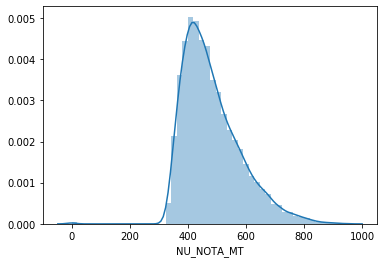

In [7]:
sns.distplot(df_train['NU_NOTA_MT'])

In [8]:
print("Skewness: %f" % df_train['NU_NOTA_MT'].skew())
print("Kurtosis: %f" % df_train['NU_NOTA_MT'].kurt())

Skewness: 0.929705
Kurtosis: 1.375564


In [9]:
df_train['NU_NOTA_MT_Bins'] = pd.qcut(df_train.NU_NOTA_MT,4)

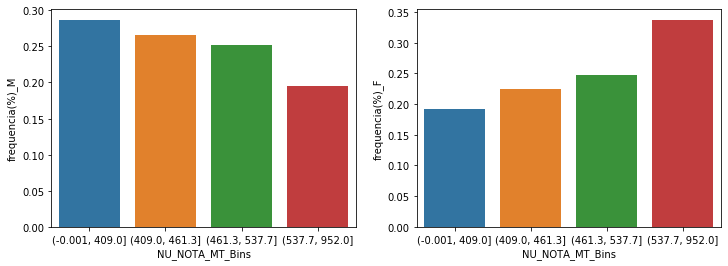

In [10]:
result = df_train.groupby(['NU_NOTA_MT_Bins', 'TP_SEXO']).size().unstack()
result['frequencia(%)_M'] = (result[result.columns[0]]/result[result.columns[0]].sum())
result['frequencia(%)_F'] = (result[result.columns[1]]/result[result.columns[1]].sum())
fig,ax = plt.subplots(1,2,figsize=(12,4))
sns.barplot(x=result.index, y='frequencia(%)_M', data=result, ax=ax[0])
sns.barplot(x=result.index, y='frequencia(%)_F', data=result, ax=ax[1])

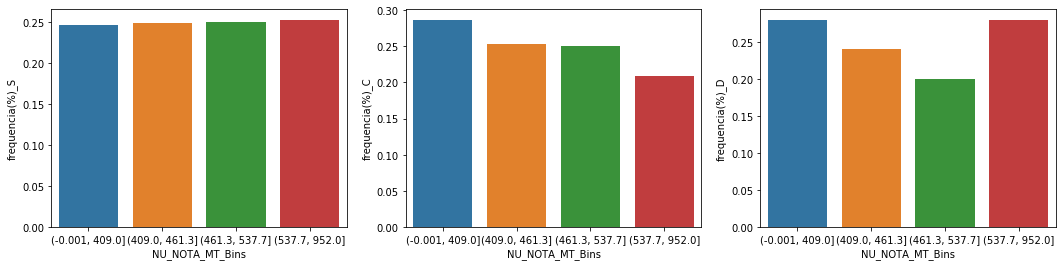

In [11]:
result = df_train.groupby(['NU_NOTA_MT_Bins', 'TP_ESTADO_CIVIL']).size().unstack()
result['frequencia(%)_S'] = (result[result.columns[0]]/result[result.columns[0]].sum())
result['frequencia(%)_C'] = (result[result.columns[1]]/result[result.columns[1]].sum())
result['frequencia(%)_D'] = (result[result.columns[2]]/result[result.columns[2]].sum())
fig,ax = plt.subplots(1,3,figsize=(18,4))
sns.barplot(x=result.index, y='frequencia(%)_S', data=result, ax=ax[0])
sns.barplot(x=result.index, y='frequencia(%)_C', data=result, ax=ax[1])
sns.barplot(x=result.index, y='frequencia(%)_D', data=result, ax=ax[2])

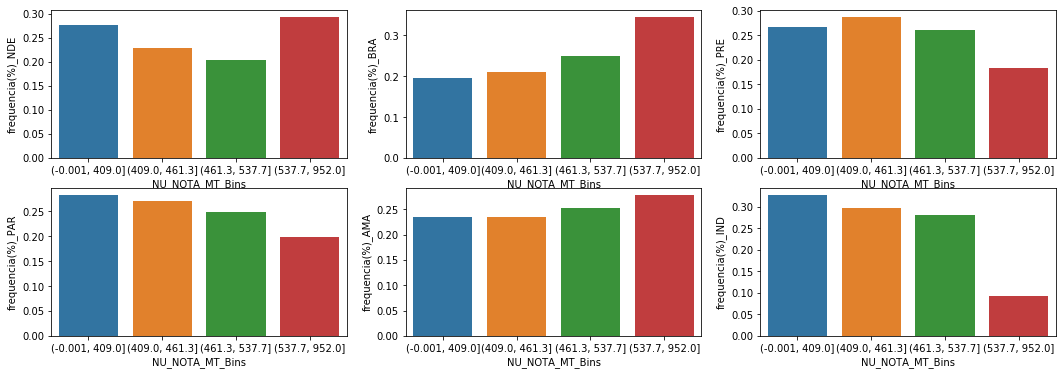

In [12]:
result = df_train.groupby(['NU_NOTA_MT_Bins', 'TP_COR_RACA']).size().unstack()
result['frequencia(%)_NDE'] = (result[result.columns[0]]/result[result.columns[0]].sum())
result['frequencia(%)_BRA'] = (result[result.columns[1]]/result[result.columns[1]].sum())
result['frequencia(%)_PRE'] = (result[result.columns[2]]/result[result.columns[2]].sum())
result['frequencia(%)_PAR'] = (result[result.columns[3]]/result[result.columns[3]].sum())
result['frequencia(%)_AMA'] = (result[result.columns[4]]/result[result.columns[4]].sum())
result['frequencia(%)_IND'] = (result[result.columns[5]]/result[result.columns[5]].sum())
result['frequencia(%)_NDI'] = (result[result.columns[5]]/result[result.columns[6]].sum())
fig,ax = plt.subplots(2,3,figsize=(18,6))
sns.barplot(x=result.index, y='frequencia(%)_NDE', data=result, ax=ax[0,0])
sns.barplot(x=result.index, y='frequencia(%)_BRA', data=result, ax=ax[0,1])
sns.barplot(x=result.index, y='frequencia(%)_PRE', data=result, ax=ax[0,2])
sns.barplot(x=result.index, y='frequencia(%)_PAR', data=result, ax=ax[1,0])
sns.barplot(x=result.index, y='frequencia(%)_AMA', data=result, ax=ax[1,1])
sns.barplot(x=result.index, y='frequencia(%)_IND', data=result, ax=ax[1,2])

# Correlação entre as novas variáveis

In [3]:
df_train = pd.read_csv('C:\\Users\\Luiz Guilherme\\Desktop\\Desafio_ENEM\\train.CSV')

df_train[['NU_NOTA_MT','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC',
          'NU_NOTA_REDACAO']] = df_train[['NU_NOTA_MT',
                                          'NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC',
                                          'NU_NOTA_REDACAO']].fillna(0)

df_train['log_nota_mt'] = np.log(df_train['NU_NOTA_MT']+0.1)
df_train['log_nota_cn'] = np.log(df_train['NU_NOTA_CN']+0.1)
df_train['log_nota_ch'] = np.log(df_train['NU_NOTA_CH']+0.1)
df_train['log_nota_lc'] = np.log(df_train['NU_NOTA_LC']+0.1)
df_train['log_nota_redacao'] = np.log(df_train['NU_NOTA_REDACAO']+0.1)

df_train['Região'] = df_train['CO_UF_RESIDENCIA']//10

df_train['TP_SEXO'] = df_train['TP_SEXO'].replace({'M':0, 'F':1})

df_train[['Q001','Q002','Q006','Q024','Q025','Q026',
          'Q047']] = df_train[['Q001','Q002','Q006','Q024','Q025','Q026',
                               'Q047']].replace({'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8,'I':9,
                                               'J':10,'K':11,'L':12,'M':13,'N':14,'O':15,'P':16,'Q':17})

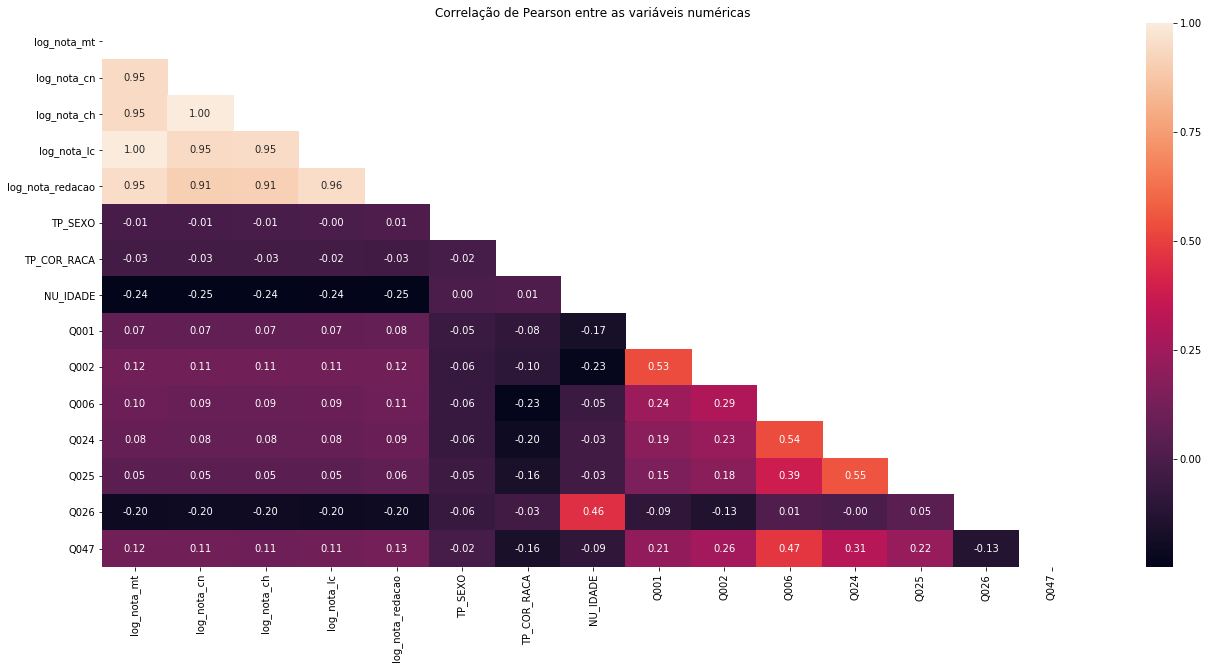

In [14]:
num_feat_corr = df_train[['log_nota_mt','log_nota_cn','log_nota_ch','log_nota_lc','log_nota_redacao',
                          'TP_SEXO','TP_COR_RACA','NU_IDADE',
                          'Q001','Q002','Q006','Q024','Q025','Q026','Q047']].corr()

mask = np.triu(np.ones_like(num_feat_corr, dtype=np.bool))
plt.figure(figsize=(22, 10))
sns.heatmap(num_feat_corr, mask=mask,fmt='.2f', annot=True)
plt.title('Correlação de Pearson entre as variáveis numéricas')
plt.show()

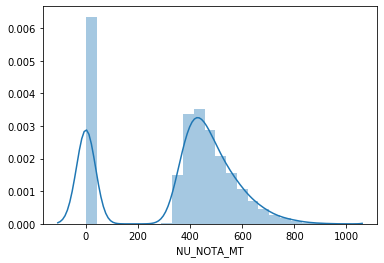

In [5]:
sns.distplot(df_train['NU_NOTA_MT'])

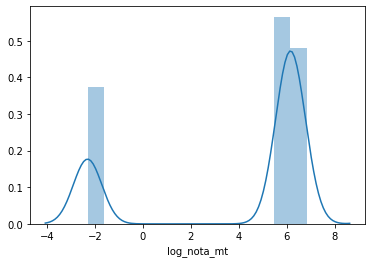

In [6]:
sns.distplot(df_train['log_nota_mt'])

# Modelagem

In [8]:
cols_train = df_train[['log_nota_cn','log_nota_ch','log_nota_lc','log_nota_redacao',
                       'NU_IDADE','TP_SEXO','TP_COR_RACA',
                       'Q001','Q002','Q006','Q024','Q025','Q026','Q047']]

scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(cols_train)

X = scaled_df
y = df_train['log_nota_mt'].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state= 0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
r2_score(y_test, y_pred)

0.9984697963765117

In [7]:
regressor = LinearRegression()
regressor.fit(X, y)
y_pred = regressor.predict(X)

y_exp = np.exp(y_pred)-0.1
r2_score(df_train['NU_NOTA_MT'].values, y_exp)

0.9024502614009234

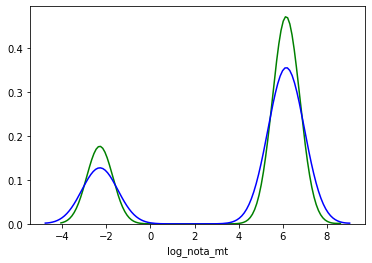

In [9]:
sns.distplot(df_train['log_nota_mt'], hist = False, color = 'G')
sns.distplot(y_pred, hist = False, color = 'B')

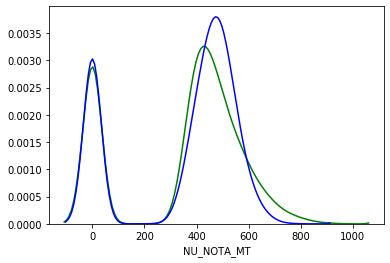

In [8]:
sns.distplot(df_train['NU_NOTA_MT'], hist = False, color = 'G')
sns.distplot(y_exp, hist = False, color = 'B')

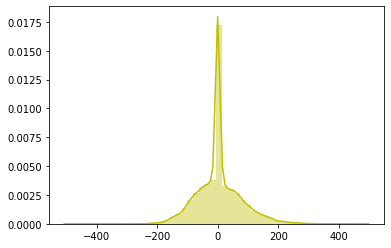

In [9]:
erro = df_train['NU_NOTA_MT'].values - y_exp
sns.distplot(erro, hist = True, color = 'Y')

In [19]:
df_test = pd.read_csv('C:\\Users\\Luiz Guilherme\\Desktop\\Desafio_ENEM\\test.CSV')

df_test[['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC',
          'NU_NOTA_REDACAO']] = df_test[['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC',
                                         'NU_NOTA_REDACAO']].fillna(0)

df_test['log_nota_cn'] = np.log(df_test['NU_NOTA_CN']+0.1)
df_test['log_nota_ch'] = np.log(df_test['NU_NOTA_CH']+0.1)
df_test['log_nota_lc'] = np.log(df_test['NU_NOTA_LC']+0.1)
df_test['log_nota_redacao'] = np.log(df_test['NU_NOTA_REDACAO']+0.1)

df_test['Região'] = df_test['CO_UF_RESIDENCIA']//10

df_test['TP_SEXO'] = df_test['TP_SEXO'].replace({'M':0, 'F':1})

df_test[['Q001','Q002','Q006','Q024','Q025','Q026',
          'Q047']] = df_test[['Q001','Q002','Q006','Q024','Q025','Q026',
                               'Q047']].replace({'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8,'I':9,
                                               'J':10,'K':11,'L':12,'M':13,'N':14,'O':15,'P':16,'Q':17})

In [20]:
cols_train = df_train[['log_nota_cn','log_nota_ch','log_nota_lc','log_nota_redacao',
                       'NU_IDADE','TP_SEXO','TP_COR_RACA',
                       'Q001','Q002','Q006','Q024','Q025','Q026','Q047']]

cols_test = df_test[['log_nota_cn','log_nota_ch','log_nota_lc','log_nota_redacao',
                     'NU_IDADE','TP_SEXO','TP_COR_RACA',
                     'Q001','Q002','Q006','Q024','Q025','Q026','Q047']]

scaler = preprocessing.StandardScaler()
scaled_df_train = scaler.fit_transform(cols_train)
scaled_df_test = scaler.fit_transform(cols_test)

X_train = scaled_df_train
X_test = scaled_df_test
y_train = df_train['log_nota_mt'].values
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

y_exp = np.exp(y_pred)-0.1
df_test['y_exp']=y_exp.round(1)
df_test[['y_exp','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_REDACAO']]

,y_exp,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO
0,388.9,464.8,443.5,431.8,420.0
1,484.1,391.1,491.1,548.0,580.0
2,584.8,595.9,622.7,613.6,320.0
3,-0.0,0.0,0.0,0.0,0.0
4,571.1,592.9,492.6,571.4,320.0
5,505.8,414.5,568.5,542.5,560.0
6,578.7,485.7,654.6,606.6,620.0
7,400.6,423.2,521.0,451.8,420.0
8,484.0,414.4,577.6,548.6,740.0
9,458.7,456.8,518.5,488.7,580.0


In [21]:
answer = pd.DataFrame({'answer':df_test['y_exp']})
answer

,answer
0,388.9
1,484.1
2,584.8
3,-0.0
4,571.1
5,505.8
6,578.7
7,400.6
8,484.0
9,458.7


In [22]:
answer.to_csv('answer.csv', index=False)

In [23]:
pd.read_csv('C:\\Users\\Luiz Guilherme\\Desktop\\Desafio_ENEM\\answer.csv')

,answer
0,388.9
1,484.1
2,584.8
3,-0.0
4,571.1
5,505.8
6,578.7
7,400.6
8,484.0
9,458.7
